<a href="https://colab.research.google.com/github/sgagankumar/Traffic-Sign-Classification/blob/master/Traffic_Signs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Traffic Sign Classification Project

In [0]:
# Collecting Dataset from bitbucket.
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random
np.random.seed(0)

In [0]:
# Loading and Spliting Datasets
with open('german-traffic-signs/train.p','rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
    test_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
    val_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

print('Number of Data Samples -')
print('Training Data :',X_train.shape)
print('Testing Data  :',X_test.shape)
print('Valing Data   :',X_val.shape)

Number of Data Samples -
Training Data : (34799, 32, 32, 3)
Testing Data  : (12630, 32, 32, 3)
Valing Data   : (4410, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "Mismatch in Training Data"
assert(X_test.shape[0] == y_test.shape[0]), "Mismatch in Testing Data"
assert(X_val.shape[0] == y_val.shape[0]), "Mismatch in Validating Data"
assert(X_train.shape[1:] == (32, 32, 3)), "Incorrect Image Dimensions"
assert(X_test.shape[1:] == (32, 32, 3)), "Incorrect Image Dimensions"
assert(X_val.shape[1:] == (32, 32, 3)), "Incorrect Image Dimensions"

In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print('The Various Classes of Traffic Signs that can be Classified by the Model:',data)

The Various Classes of Traffic Signs that can be Classified by the Model:     ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                 

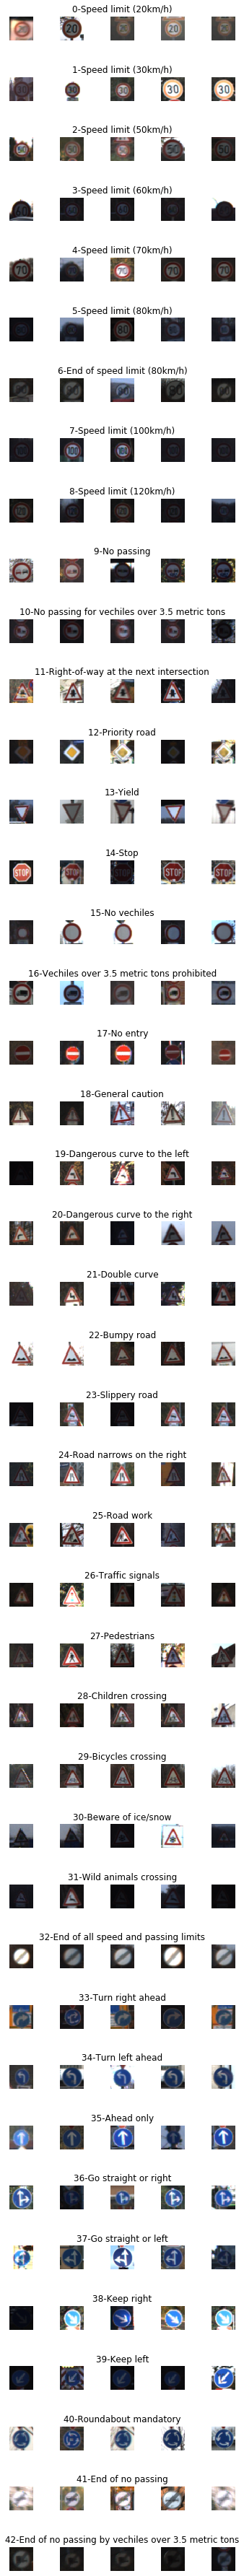

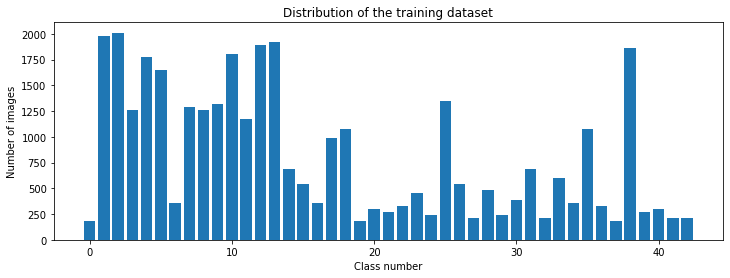

Count of Samples:  [180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


In [0]:
num_of_samples = []
cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, 175), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))

plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
print("Count of Samples: ",num_of_samples)

(32, 32, 3)
36


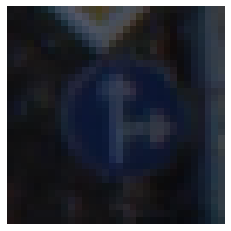

In [0]:
import cv2

# Change index between 0 to 34799 to view different sample images
index=1000
plt.imshow(X_train[index])
plt.axis("off")
print(X_train[index].shape)
print(y_train[index])

In [0]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

(32, 32)


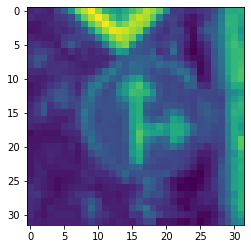

In [0]:
img = grayscale(X_train[index])
plt.imshow(img)
print(img.shape)

(32, 32)


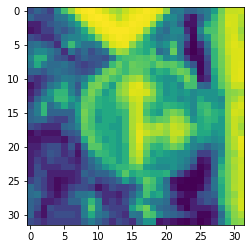

In [0]:
img = equalize(img)
plt.imshow(img)
print(img.shape)

(32, 32)


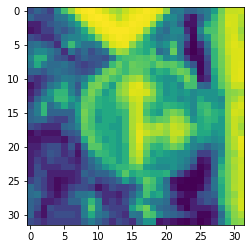

In [0]:
img = preprocessing(X_train[index])
plt.imshow(img)
print(img.shape)

In [0]:
X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))

(34799, 32, 32, 1)


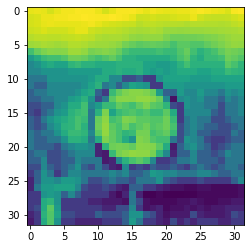

In [0]:
# plt.imshow(X_train[random.randint(0,len(X_train)-1)])    #plot a random image to show preprocessed datasets
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

print(X_train.shape)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, zoom_range = 0.2, shear_range = 0.1, rotation_range = 10)

datagen.fit(X_train)

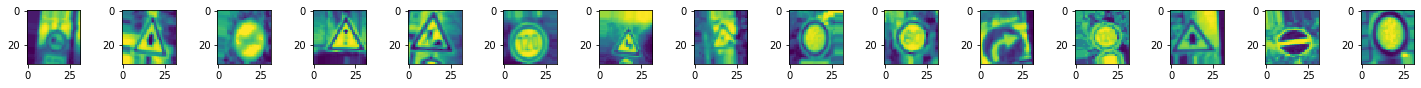

In [0]:
batches = datagen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(nrows=1, ncols = 15, figsize=(20, 5))
fig.tight_layout()
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32))

In [0]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation='relu'))
    model.add(Conv2D(60, (5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(30, (3,3), activation='relu'))
    model.add(Conv2D(30, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
model = leNet_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 480)              

In [0]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs=10, validation_data=(X_val, y_val), verbose = 1, shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.9203 - acc: 0.7298 - val_loss: 0.0981 - val_acc: 0.9680
Epoch 2/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.2280 - acc: 0.9283 - val_loss: 0.0811 - val_acc: 0.9782
Epoch 3/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.1549 - acc: 0.9515 - val_loss: 0.0393 - val_acc: 0.9873
Epoch 4/10
2000/2000 [==============================] - 37s 18ms/step - loss: 0.1199 - acc: 0.9632 - val_loss: 0.0262 - val_acc: 0.9930
Epoch 5/10
2000/2000 [==============================] - 37s 19ms/step - loss: 0.1009 - acc: 0.9692 - val_loss: 0.0234 - val_acc: 0.9927
Epoch 6/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.0837 - acc: 0.9743 - val_loss: 0.0380 - val_acc: 0.9889
Epoch 7/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.0776 - acc: 0.9763 - val_loss: 0.0665 - val_acc: 0.9862
Epoch 8/10
2000/2000 [==========================

Text(0.5, 0, 'epochs')

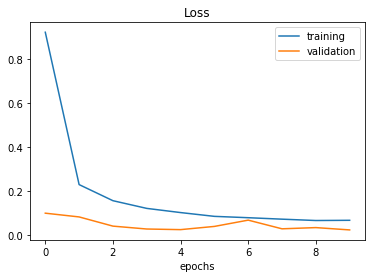

In [0]:
# Training-Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

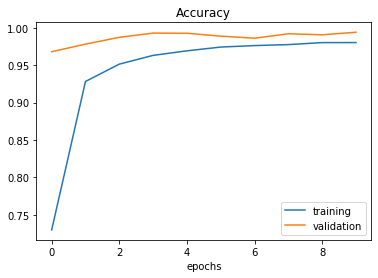

In [0]:
# Model Training-Accuracy Graph
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epochs')

In [0]:
# Evaluation on Test Dataset
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score    :',score[0])
print('Test Accuracy :',score[1])

Test Score    : 0.11370679971374342
Test Accuracy : 0.972288202739196


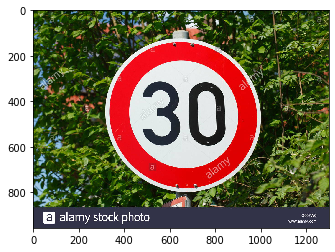

In [0]:
# URLS                                                                                                                              Class
url1 = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'                       #1
url2 = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'                                 #34
url3 = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'   #23
url4 = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'              #13
url5 = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'                                             #29

#fetch image
import requests
from PIL import Image
url = url1                      # NOTE: Replace img1-5 to test on different images
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


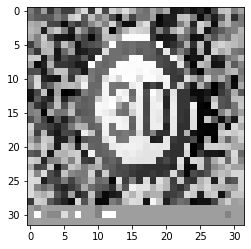

In [0]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

#Reshape reshape
img = img.reshape(1, 32, 32, 1)

In [0]:
#Test image
resultid=model.predict_classes(img)
print("predicted sign: "+ str(data["SignName"][resultid]))

predicted sign: 1    Speed limit (30km/h)
Name: SignName, dtype: object
